In [ ]:
import numpy as np
import time
import copy

K=50 #N=8, K=5
N=100

# Data test


In [ ]:
def generate_test(K,N):
    f = open('8nodes(5)', 'w')
    f.write(str(N+1)+'\n')
    f.write('0 0\n')

    for i in range(N):
        x = np.random.randint(-100, 100)
        y = np.random.randint(-100, 100)
        f.write('{} {}\n'.format(x, y))

    f.close()

generate_test(K,N)

In [ ]:
def load_data(path = "8nodes(5)"):
    with open(path, 'r') as f:
        inputData = f.readlines()
    
    N = int(inputData[0].strip())
    node_list=[]
    for node in inputData[1:]:
        #del '\n' 
        node = node.strip()
        #split by ' '
        node = node.split(' ')
        node_list.append((int(node[0]), int(node[1])))

    return node_list, N

In [ ]:
node_list, num_nodes = load_data()

In [ ]:
def DistanceMatrix(cities, n):
    dis_matrix = np.zeros([n,n])
    min_dis = np.full((n, 2), np.inf)
    adv0 = []
    for i in range(n):
        for j in range(i+1, n):
            a = np.array(cities[i])
            b = np.array(cities[j])
            c = a - b
            dis_matrix[i, j] = np.sqrt(np.sum(c*c))
            if dis_matrix[i, j] < min_dis[i, 1]:
              min_dis[i, 0] = j
              min_dis[i, 1] = dis_matrix[i, j]
            dis_matrix[j, i] = dis_matrix[i, j]
            if dis_matrix[j, i] < min_dis[j, 1] and i != 0:
              min_dis[j, 0] = i
              min_dis[j, 1] = dis_matrix[i, j]
            if i == 0: adv0.append((dis_matrix[i, j], j))
    
    adv0.sort(key=lambda tup: tup[0], reverse = False)

    return np.around(dis_matrix, 2), np.around(min_dis, 2), adv0

dis_matrix, min_dis, adv0 = DistanceMatrix(node_list, num_nodes)

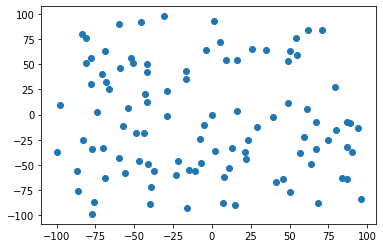

In [ ]:
import matplotlib.pyplot as plt

points = np.array(node_list)

plt.scatter(points[:, 0], points[:, 1])

# Algorithm Local Search

In [ ]:
# randomly init
def init(K,N):
  X = [[0] for i in range(K)]
  for i in range(N):
    a = np.random.random_integers(0,K-1)
    X[a].append(i+1)
  return X

#tim thu tu di cua cac buu ta
def TSP():
  return

#calculate dis
def calculate_dis(X, dis_matrix, K):
  dis = np.zeros((K,1))
  for i in range(K):
    len_Xi = len(X[i]) - 1
    for j in range(len_Xi):
      a = int(X[i][j])
      b = int(X[i][j+1])
      dis[i] = dis[i] + dis_matrix[a][b]
    c = int(X[i][len_Xi])
    dis[i] = dis[i] + dis_matrix[c][0]
  return dis

def update_dis(dis, X, a, b):   #tinh lai dis sau khi chuyen tu max -> min
  dis[a] = 0
  dis[b] = 0
  for i in range(len(X[a])-1):
    dis[a] = dis[a] + dis_matrix[int(X[a][i])][int(X[a][i+1])]
  dis[a] = dis[a] + dis_matrix[X[a][len(X[a])-1]][0]
  for i in range(len(X[b])-1):
    dis[b] = dis[b] + dis_matrix[int(X[b][i])][int(X[b][i+1])]
  dis[b] = dis[b] + dis_matrix[X[b][len(X[b])-1]][0]
  return dis

In [ ]:
X = init(K,N)
dis = calculate_dis(X, dis_matrix, K)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 49 + 1) instead
  """


In [ ]:
def TRY_first_improvement(current_optimum, X, index_max, index_min):
  dis = calculate_dis(X, dis_matrix, K)
  for i in range(len(X[index_max])-1):
    Y = copy.deepcopy(X)
    tmp = X[index_max][i+1]
    Y[index_max].remove(tmp)
    Y[index_min].append(tmp)
    dis = update_dis(dis, Y, index_max, index_min)
    if(dis.max() < current_optimum):
      return (Y, dis, True)
  return (X, dis, False)
  #move each elements from dis[max] -> dis[min]
    #calculate dis    => compare current optimum
  # return X,true
  
def TRY_best_improvement(current_optimum, X, index_max, index_min):
  index_candidate = 0
  dis = calculate_dis(X, dis_matrix, K)
  for i in range(len(X[index_max])-1):
    Y = copy.deepcopy(X)
    tmp = X[index_max][i+1]
    Y[index_max].remove(tmp)
    Y[index_min].append(tmp)
    dis = update_dis(dis, Y, index_max, index_min)
    if(dis.max() < current_optimum):
      current_optimum = dis.max()
      index_candidate = i+1
  if(index_candidate != 0):
    Y = copy.deepcopy(X)
    tmp = X[index_max][index_candidate]
    Y[index_max].remove(tmp)
    Y[index_min].append(tmp)
    dis = update_dis(dis, Y, index_max, index_min)
    return (Y, dis, True)
  else:
    return (X, dis, False)


def TRY_(X, dis):
  index_max = np.argmax(dis)
  index_min = np.argmin(dis)
  #Choose (best candidate, first candidate, )
  #X, dis, tmp = TRY_first_improvement(dis.max(), X, index_max, index_min)
  X, dis, tmp = TRY_best_improvement(dis.max(), X, index_max, index_min)
  if(tmp):
     return TRY_(X, dis)
  else:
     return (X, dis)



In [ ]:
X,dis = TRY_(X, dis)
print(X)
print(dis)

[[0, 22, 37, 57], [0, 8, 39], [0, 3], [0, 9, 32], [0, 20, 79], [0, 26], [0, 14, 87, 99], [0, 56, 66], [0, 12, 23, 31], [0, 30, 78, 98], [0, 88, 97], [0, 76], [0, 17, 18, 86], [0, 33], [0, 35, 92], [0, 54, 69, 34], [0, 47, 61, 64, 67], [0, 82, 93], [0, 49, 55, 60], [0, 25, 62], [0, 75, 6], [0, 28], [0, 21], [0, 50, 63], [0, 24, 5], [0, 13, 44], [0, 43, 53], [0, 70], [0, 16, 36, 94], [0, 10], [0, 4, 81], [0, 83, 90], [0, 59, 74], [0, 51], [0, 15, 40, 45], [0, 11], [0, 48, 85], [0, 89, 100], [0, 73], [0, 77, 7], [0, 71], [0, 84, 58], [0, 2, 29], [0, 91], [0, 41, 95], [0, 27, 38, 72], [0, 1, 42], [0, 19, 65, 68], [0, 46, 52], [0, 80, 96]]
[[208.02]
 [241.29]
 [231.04]
 [187.88]
 [211.35]
 [205.58]
 [319.12]
 [293.29]
 [183.6 ]
 [198.19]
 [208.8 ]
 [216.34]
 [330.47]
 [210.  ]
 [246.92]
 [259.63]
 [290.02]
 [232.48]
 [262.84]
 [310.17]
 [285.09]
 [222.42]
 [357.54]
 [272.02]
 [310.5 ]
 [195.54]
 [277.36]
 [216.  ]
 [332.37]
 [219.98]
 [198.06]
 [232.87]
 [266.02]
 [194.62]
 [341.59]
 [186.8